# Credit Card Default Prediction

![banner](./visualizations/banner.jpg)

## Overview

## Business Problem

## Data & Methods

In [1]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# add import for Decision Treees
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pickle

## 1. Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv', index_col=0)
# index_col=0 prevents generating that 'Unnamed:0' column

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


The raw dataset comes with columns that are not easy to read. By using the research study's [legend](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients), we can replace these names with more descriptive ones.

In [4]:
# making dataframe mor readable by creating new column names
rename_list = ['max_credit_given', 'gender', 'education', 'marital_status', 'age',
'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 
'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
col_rename = dict(zip(df.columns,rename_list))
df = df.rename(columns=col_rename)

In [5]:
# checking that it worked
df.head()

,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_april,default
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [6]:
df.iloc[18381]

max_credit_given                     LIMIT_BAL
gender                                     SEX
education                            EDUCATION
marital_status                        MARRIAGE
age                                        AGE
pay_status_sept                          PAY_0
pay_status_aug                           PAY_2
pay_status_july                          PAY_3
pay_status_june                          PAY_4
pay_status_may                           PAY_5
pay_status_april                         PAY_6
bill_sept                            BILL_AMT1
bill_aug                             BILL_AMT2
bill_july                            BILL_AMT3
bill_june                            BILL_AMT4
bill_may                             BILL_AMT5
bill_april                           BILL_AMT6
payment_sep                           PAY_AMT1
payment_aug                           PAY_AMT2
payments_jul                          PAY_AMT3
payment_jun                           PAY_AMT4
payment_may  

In [7]:
df.shape

(22500, 24)

In [8]:
# drop the row if has text in it
df.drop(df[df.gender == 'SEX'].index, inplace=True)

In [9]:
# checking that worked
df.shape

(22499, 24)

#### now that the row with column names is gone, we can convert the entire dataframe from objects to float/int

In [10]:
# checking data types
df.info()
# theyre all objects, we need to change this

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
max_credit_given    22499 non-null object
gender              22499 non-null object
education           22499 non-null object
marital_status      22499 non-null object
age                 22499 non-null object
pay_status_sept     22499 non-null object
pay_status_aug      22499 non-null object
pay_status_july     22499 non-null object
pay_status_june     22499 non-null object
pay_status_may      22499 non-null object
pay_status_april    22499 non-null object
bill_sept           22499 non-null object
bill_aug            22499 non-null object
bill_july           22499 non-null object
bill_june           22499 non-null object
bill_may            22499 non-null object
bill_april          22499 non-null object
payment_sep         22499 non-null object
payment_aug         22499 non-null object
payments_jul        22499 non-null object
payment_jun         22499 non-null object
payment_may

In [11]:
# changing all values from objects to
df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
max_credit_given    22499 non-null int64
gender              22499 non-null int64
education           22499 non-null int64
marital_status      22499 non-null int64
age                 22499 non-null int64
pay_status_sept     22499 non-null int64
pay_status_aug      22499 non-null int64
pay_status_july     22499 non-null int64
pay_status_june     22499 non-null int64
pay_status_may      22499 non-null int64
pay_status_april    22499 non-null int64
bill_sept           22499 non-null int64
bill_aug            22499 non-null int64
bill_july           22499 non-null int64
bill_june           22499 non-null int64
bill_may            22499 non-null int64
bill_april          22499 non-null int64
payment_sep         22499 non-null int64
payment_aug         22499 non-null int64
payments_jul        22499 non-null int64
payment_jun         22499 non-null int64
payment_may         22499 non-nu

In [13]:
df.head()

,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_april,default
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


### Fixing 3 main categorical variables

In [14]:
# Categorical variables description
df[['gender', 'education', 'marital_status']].describe()

,gender,education,marital_status
count,22499.000000,22499.000000,22499.000000
mean,1.603227,1.855282,1.553358
std,0.489239,0.791905,0.521418
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [15]:
# Next deal with- why are there other educations besides 1-4 ??
df['education'].value_counts()

2    10516
1     7919
3     3713
5      208
4       90
6       42
0       11
Name: education, dtype: int64

- 'education' has category 5 and 6 that are unlabeled, and the category 0 is undocumented.
- 'marital_status' has a label 0 that is undocumented

They just put the weird values in the 'other' categories. is this safe to do?
let's check to see what other people did first
- 'other' in education can be an education lower than the high school level.
- 'other' in marital_status could be, for example, "divorced".

In [16]:
# fixing 'education' column by putting unknown variables in 'other' category (4)
fix_edu = (df.education == 5) | (df.education == 6) | (df.education == 0)
df.loc[fix_edu, 'education'] = 4

# fixing 'marital_status' column
df.loc[df.marital_status == 0, 'marital_status'] = 3

In [17]:
df.education.value_counts()

2    10516
1     7919
3     3713
4      351
Name: education, dtype: int64

In [18]:
df.marital_status.value_counts()

2    12026
1    10195
3      278
Name: marital_status, dtype: int64

## Checking for irregularities, by column groups



### checking History of Past Payment (payment delay)

In [19]:
# this should be on a scale from -1, 1-9
# -1 being 'pay duly' and 1-9 being how many months of payment delay

df[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']].describe()

,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,-0.287613
std,1.123191,1.197954,1.198880,1.174824,1.139984,1.154249
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


- There shouldn't be any -2 here, so let's just set it to 'pay duly' as if there wasn't any delay
- and 'pay duly' should probably just be 0 instead of -1 because that means the payment wasn't delayed

In [20]:
fix_status = (df.pay_status_sept == -2) | (df.pay_status_sept == 0)
df.loc[fix_status, 'pay_status_sept'] = -1

fix_status = (df.pay_status_aug == -2) | (df.pay_status_aug == 0)
df.loc[fix_status, 'pay_status_aug'] = -1

fix_status = (df.pay_status_july == -2) | (df.pay_status_july == 0)
df.loc[fix_status, 'pay_status_july'] = -1

fix_status = (df.pay_status_june == -2) | (df.pay_status_june == 0)
df.loc[fix_status, 'pay_status_june'] = -1

fix_status = (df.pay_status_may == -2) | (df.pay_status_may == 0)
df.loc[fix_status, 'pay_status_may'] = -1

fix_status = (df.pay_status_april == -2) | (df.pay_status_april == 0)
df.loc[fix_status, 'pay_status_april'] = -1

### checking amount of bill statement

In [21]:
# checking amount of bill statement
df[['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']].describe()

,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april
count,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000
mean,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356
std,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959
min,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000
25%,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000
50%,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000
75%,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


- negative values can be interpreted as credit

### checking amount of previous statement

In [22]:
# checking amount of previous statement
df[['payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april']].describe()

,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_april
count,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000
mean,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301
std,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000
50%,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000


## 2: Data Visualization & EDA
#### Check cleaning_EDA.ipynb for full EDA process

### checking the amount of credit given to each person

In [23]:
# checking the amount of credit given to each person
df.max_credit_given.describe()

count      22499.000000
mean      167054.521534
std       129864.960118
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: max_credit_given, dtype: float64

In [24]:
# general idea of the default probablity for this dataset?
df.default.sum() / len(df.default)

0.22347659895995378

#### ^ This will be the same when we check class imabalance later

## 3. Feature Engineering

In [25]:
df.head()

,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_april,default
28835,220000,2,1,2,36,-1,-1,-1,-1,-1,-1,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,-1,-1,-1,-1,-1,-1,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,-1,-1,-1,-1,-1,-1,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [26]:
df[['gender','education','marital_status']] = df[['gender','education','marital_status']].astype('object')

# dummying
df = pd.get_dummies(df)
df.head()

,max_credit_given,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_april,default,gender_1,gender_2,education_1,education_2,education_3,education_4,marital_status_1,marital_status_2,marital_status_3
28835,220000,36,-1,-1,-1,-1,-1,-1,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,1,1,0,0,0,0,1,0
25329,200000,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,0,1,0,0,1,0,0,1,0
18894,180000,27,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
690,80000,32,-1,-1,-1,-1,-1,-1,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,1,0,0,1,0,0,0,1,0
6239,10000,27,-1,-1,-1,-1,-1,-1,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,1,0,0,1,0,0,0,1,0


## 4. Train-Test Split
### Preparing data for TTS

In [27]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('default', axis = 1)

# Create target variable
y = df['default'] # y is the column we're trying to predict

### Checking for class imbalance in 'default' column

In [28]:
df['default'].value_counts()
# this means that there is a class imbalance!!

0    17471
1     5028
Name: default, dtype: int64

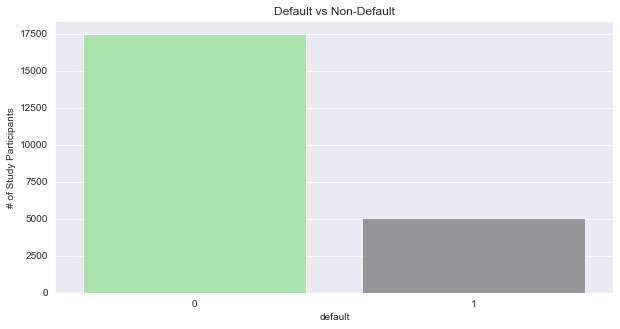

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(y, alpha =.80, palette= ['lightgreen','grey'])
plt.title('Default vs Non-Default')
plt.ylabel('# of Study Participants')
plt.show()

### We can deal with this class imbalance by just penalizing the algorithm with `weights = distance` for KNN and `class_weight = balanced` for Logistic Regression

In [30]:
# performing the TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [31]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## Model 1: K Nearest Neighbors

In [32]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [33]:
# predict the training set
knn_y_pred_train = knn.predict(X_train)

# Predict the for test set
knn_tree_y_pred_test = knn.predict(X_test)

In [34]:
print('Untuned K Nearest Neighbors Model')
print("Training F1 Score: ", metrics.f1_score(y_train, knn_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, knn_tree_y_pred_test))

Untuned K Nearest Neighbors Model
Training F1 Score:  0.9993359011820959
Testing F1 Score:  0.424415832141154


### Use grid search to optomize the hyperparameters

In [35]:
# creating our estimator
k_near = KNeighborsClassifier(weights='distance')

In [36]:
# creating our parameters to test
k_param_dict={'n_neighbors': range(4,15,1)}

In [37]:
# create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_k_neighbors = GridSearchCV(k_near, k_param_dict, cv=5, scoring='f1', verbose=1)

In [38]:
# fit the grid search to our data
grid_k_neighbors.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': range(4, 15)}, scoring='f1', verbose=1)

In [39]:
# examine the best model
# Best F1 scoree achieved across all params
print('F1 Score:', grid_k_neighbors.best_score_)

# Checking dictionary showing the best hyperparameters used to generate that score
print('Best Hyperparameters:', grid_k_neighbors.best_params_)

# Actual model object fit with those best parameters
# also shows default parameters that we did not specify
print('Model object with best parameters: ')
print(grid_k_neighbors.best_estimator_)

F1 Score: 0.43350915712592125
Best Hyperparameters: {'n_neighbors': 14}
Model object with best parameters: 
KNeighborsClassifier(n_neighbors=14, weights='distance')


In [40]:
# Predict the response for test dataset
tuned_k_neighbors_y_pred_train = grid_k_neighbors.best_estimator_.predict(X_train)

# predict the training set
tuned_k_neighbors_y_pred_test = grid_k_neighbors.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print('Tuned K Nearest Neighbors Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_k_neighbors_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_k_neighbors_y_pred_test))

Tuned K Nearest Neighbors Predictions
F1 on train set: 0.9993359011820959
F1 on test set: 0.4361757105943152


## Model 2: Logisitic Regression

In [41]:
# instantiate
logreg = LogisticRegression(C=1e9, class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced')

In [42]:
# predict the training set
logreg_y_pred_train = logreg.predict(X_train)
# Predict the for test set
logreg_y_pred_test = logreg.predict(X_test)

In [43]:
print('Untuned Logistic Regression Model')
print("Training F1 Score: ", metrics.f1_score(y_train, logreg_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, logreg_y_pred_test))

Untuned Logistic Regression Model
Training F1 Score:  0.525810028335592
Testing F1 Score:  0.5414847161572053


In [44]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

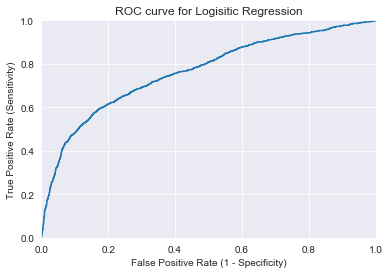

In [45]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logisitic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [46]:
# Generating AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))
# print('AUC: {}'.format(auc(fpr, tpr)))

0.7648104562526212


Let's intepret this **ROC Curve**:
- Ideally, we want an ROC that hugs the upper left corner of the graph
- We can also use the ROC to determine the threshold with the threshold with the best precision-recall tradeoff.

Interpret AUC:
- Ideally, we want an AUC of 1
- So this model's predictions are only 76.68% correct

Let's also create a **confusion matrix** here

In [47]:
# y_true = y_test (ground truth/ correct target values)
# y_pred = logreg_y_pred_test (estimated targets as returned by classifier)

confusion = metrics.confusion_matrix(y_test, logreg_y_pred_test)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [48]:
# print(metrics.confusion_matrix(y_test, y_pred_class))
confusion

array([[3621,  743],
       [ 517,  744]])

In [49]:
# formula for accuracy
print((TP + TN) / float(TP + TN + FP + FN))
# metrics.accuracy_score(y_test, logreg_y_pred_test)

0.776


In [50]:
# print(metrics.classification_report(y_test, logreg_y_pred_test))

In [51]:
print('accuracy:', metrics.accuracy_score(y_test, logreg_y_pred_test))
print('precision:', metrics.precision_score(y_test, logreg_y_pred_test))
print('recall:', metrics.recall_score(y_test, logreg_y_pred_test))
print('specificity:', TN / float(TN + FP))
print('f1 score:', metrics.f1_score(y_test, logreg_y_pred_test))

accuracy: 0.776
precision: 0.5003362474781439
recall: 0.5900079302141158
specificity: 0.8297433547204399
f1 score: 0.5414847161572053


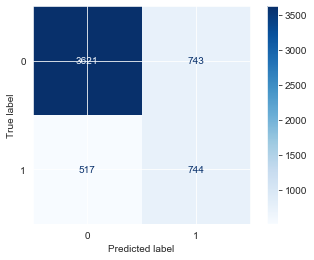

In [52]:
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)

### Use grid search to optomize the hyperparameters

In [53]:
# creating our estimator
tuned_log = LogisticRegression(random_state=6, class_weight='balanced')

In [54]:
# creating our parameters to test
log_param_dict={'C': range(3,7,1),
                'penalty': ['l1','l2']}

In [55]:
grid_log = GridSearchCV(tuned_log, log_param_dict, cv=5, scoring='f1', verbose=1)

# c = decision boundary threshold

In [56]:
grid_log.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.3s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=6),
             param_grid={'C': range(3, 7), 'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [57]:
# examine the best model
print('F1 Score:', grid_log.best_score_)

print('Best Hyperparameters:', grid_log.best_params_)

print('Model object with best parameters: ')
print(grid_log.best_estimator_)

F1 Score: 0.5230355488559063
Best Hyperparameters: {'C': 3, 'penalty': 'l2'}
Model object with best parameters: 
LogisticRegression(C=3, class_weight='balanced', random_state=6)


In [58]:
# Predict the response for test dataset
grid_log_y_pred_train = grid_log.best_estimator_.predict(X_train)

# predict the training set
grid_log_y_pred_test = grid_log.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print('Tuned Logistic Regression Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, grid_log_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, grid_log_y_pred_test))

Tuned Logistic Regression Model Predictions
F1 on train set: 0.525810028335592
F1 on test set: 0.5414847161572053


## Model 3: Decision Tree

In [59]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)

In [60]:
# predict the training set
tree_y_pred_train = tree.predict(X_train)

# Predict the for test set
tree_y_pred_test = tree.predict(X_test)

In [61]:
print('Untuned Decision Tree Model')
print("Training F1 Score: ", metrics.f1_score(y_train, tree_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, tree_y_pred_test))

Untuned Decision Tree Model
Training F1 Score:  0.9993359011820959
Testing F1 Score:  0.38554216867469876


### Tuning Decision Tree Model with grid search

In [62]:
# creating our estimator
decision_tree = DecisionTreeClassifier(random_state=3, criterion='gini')

In [63]:
# creating our parameters to test
param_dict={'max_depth': range(2,15,1), 
            'max_leaf_nodes': range(2,30,2),
            'min_samples_split': range(2,4,1)}

In [64]:
# create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree = GridSearchCV(decision_tree, param_dict, cv=5, scoring='f1', verbose=1)
# cv is the number of folds
# scoring is f1
# verbose=1 is important for time 

In [65]:
# fit the grid search to our data
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 364 candidates, totalling 1820 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1820 out of 1820 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'max_depth': range(2, 15),
                         'max_leaf_nodes': range(2, 30, 2),
                         'min_samples_split': range(2, 4)},
             scoring='f1', verbose=1)

In [66]:
# examine the best model
# Best F1 scoree achieved across all params
print('F1 Score:', grid_tree.best_score_)

# Checking dictionary showing the best hyperparameters used to generate that score
print('Best Hyperparameters:', grid_tree.best_params_)

# Actual model object fit with those best parameters
# also shows default parameters that we did not specify
print('Model object with best parameters: ')
print(grid_tree.best_estimator_)

F1 Score: 0.47466865343357495
Best Hyperparameters: {'max_depth': 4, 'max_leaf_nodes': 12, 'min_samples_split': 2}
Model object with best parameters: 
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12, random_state=3)


In [67]:
# Predict the response for test dataset
tuned_tree_y_pred_train = grid_tree.best_estimator_.predict(X_train)

# predict the training set
tuned_tree_y_pred_test = grid_tree.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print('Tuned Decision Tree Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))

Tuned Decision Tree Model Predictions
F1 on train set: 0.48081225262433314
F1 on test set: 0.48879837067209775


## Model 4: Random Forest

In [68]:
rfc = RandomForestClassifier(random_state = 5, criterion='gini' , class_weight='balanced')

In [69]:
# creating our parameters to test
rfc_param_dict={'n_estimators':[50,100],
            'max_depth': list(range(2,15)), 
            'max_features': list(range(5,15))
            }

In [70]:
# create a grid search object and fit it to the data
grid_forest = GridSearchCV(rfc, rfc_param_dict, cv=5, scoring='f1', verbose=1, n_jobs=2)

In [71]:
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.4min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 20.9min
[Parallel(n_jobs=2)]: Done 1300 out of 1300 | elapsed: 22.7min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=5),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [72]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

0.5399529757163821
{'max_depth': 4, 'max_features': 7, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=7,
                       random_state=5)


In [75]:
# Predict the response for test dataset
forest_y_pred_train = grid_tree.best_estimator_.predict(X_train)

# predict the training set
forest_y_pred_test = grid_tree.best_estimator_.predict(X_test)


# Model F1, how often is the classifier correct?
print("F1 on train set: ",metrics.f1_score(y_train, forest_y_pred_train))
print("F1 on test set: ",metrics.f1_score(y_test, forest_y_pred_test))

F1 on train set:  0.48081225262433314
F1 on test set:  0.48879837067209775


## Feature Selection
Does this step actually go here?

## 6. Model Evaluation

In [78]:
# Model 1: KNN
print('Baseline K Nearest Neighbors')
print("Training F1 Score: ", metrics.f1_score(y_train, knn_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, knn_tree_y_pred_test))
print('')
print('Tuned K Nearest Neighbors')
print("F1 on train set:",metrics.f1_score(y_train, tuned_k_neighbors_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_k_neighbors_y_pred_test))
print('')
# Model 2: Logistic Regression
print('Baseline Logistic Regression')
print("F1 on train set: ", metrics.f1_score(y_train, logreg_y_pred_train))
print("F1 on test set: ", metrics.f1_score(y_test, logreg_y_pred_test))
print('')
print('Tuned Logistic Regression Model')
print("F1 on train set:",metrics.f1_score(y_train, grid_log_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, grid_log_y_pred_test))
print('')
# Model 3: Decision Tree
print('Baseline Decision Tree')
print("Training F1 Score: ", metrics.f1_score(y_train, tree_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, tree_y_pred_test))
print('')
print('Tuned Decision Tree')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))
print('Best Hyperparameters:', grid_tree.best_params_)

print('')
print('Tuned Random Forest')
print("F1 on test set: ",metrics.f1_score(y_test, forest_y_pred_test))
print('Best Hyperparameters:', grid_forest.best_params_)

Baseline K Nearest Neighbors
Training F1 Score:  0.9993359011820959
Testing F1 Score:  0.424415832141154

Tuned K Nearest Neighbors
F1 on train set: 0.9993359011820959
F1 on test set: 0.4361757105943152

Baseline Logistic Regression
F1 on train set:  0.525810028335592
F1 on test set:  0.5414847161572053

Tuned Logistic Regression Model
F1 on train set: 0.525810028335592
F1 on test set: 0.5414847161572053

Baseline Decision Tree
Training F1 Score:  0.9993359011820959
Testing F1 Score:  0.38554216867469876

Tuned Decision Tree
F1 on train set: 0.48081225262433314
F1 on test set: 0.48879837067209775
Best Hyperparameters: {'max_depth': 4, 'max_leaf_nodes': 12, 'min_samples_split': 2}

Tuned Random Forest
F1 on test set:  0.48879837067209775
Best Hyperparameters: {'max_depth': 4, 'max_features': 7, 'n_estimators': 100}


In [69]:
# metrics = {'Model': ['Baseline K Nearest Neighbors','Tuned K Nearest Neighbors','Baseline Logistic Regression','Tuned Logistic Regression', 'Baseline Decision Tree', 'Tuned Decision Tree'],
#         'Test Set': [ metrics.f1_score(y_test, knn_tree_y_pred_test) ,
#                     metrics.f1_score(y_test, tuned_k_neighbors_y_pred_test) ,
#                     metrics.f1_score(y_test, logreg_y_pred_test) ,
#                     metrics.f1_score(y_test, grid_log_y_pred_test) ,
#                     metrics.f1_score(y_test, tree_y_pred_test) ,
#                     metrics.f1_score(y_test, tuned_tree_y_pred_test) ]}

# metrics_df = pd.DataFrame(metrics, columns = ['Model','Price'])

## 7. Final Model

### Refitting model to the entire df

In [79]:
features = df.drop('default', axis = 1)
# Create target variable
target = df['default'] # y is the column we're trying to pred

In [80]:
# best_model = pickle.dumps(grid_log.best_estimator_) 
best_model = RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=7, random_state=5)

In [81]:
best_model = best_model.fit(features,target)

### exporting to pickle

In [82]:
pickle_out = open("last_model.pickle","wb")
pickle.dump(best_model, pickle_out)
pickle_out.close()

In [83]:
# trying scaler

In [84]:
scaler_pickle_out = open("last_scaler.pickle","wb")
pickle.dump(scaler, scaler_pickle_out)
scaler_pickle_out.close()